# **Project Name-** Real Estate Investment Advisor: Predicting Property Profitability & Future Value


# **Project Summary**-

This project performs an in-depth **Exploratory Data Analysis (EDA)** on an Indian real estate dataset to understand how different property features impact **current price**, **price per square foot**, and **investment attractiveness**.

The goal is to extract **business insights for investors**, such as:

- How price and size are distributed across properties  
- How location (state, city, locality) affects prices  
- How amenities, parking, security, and public transport access influence property value  
- How structural features like BHK, floor, age of property relate to price and price per sq ft  

The findings from this EDA will later guide:

1. A **Classification model** — to label a property as a **“Good Investment”** or not  
2. A **Regression model** — to predict the **future price after 5 years**  

By understanding the relationships between features, we can engineer better variables, pick suitable models, and design a more insightful **Streamlit application** for real estate investment advice.


# **Github Link-**
https://github.com/Drishanv/Real-Estate-Investment-Advisor-Predicting-Property-Profitability-Future-Value


# **Problem Statement**-

Real estate investors often struggle to identify which properties will deliver **good returns** over the next few years. Traditional methods rely heavily on intuition, location reputation, or broker opinions, which may be biased or incomplete.

Using the **India housing dataset (`india_housing_prices.csv`)**, our objective is to:

1. Explore how **price**, **price per sq ft**, and other numeric attributes behave across the dataset  
2. Study how **location, BHK, amenities, parking, security, and accessibility** influence property value  
3. Derive insights and patterns that can later support:
   - A **Good Investment** classification rule / model  
   - A **Future Price (5 years)** regression model  

This EDA will also touch upon several key business questions**, such as:

- What is the distribution of property prices and sizes?  
- How does **price per sq ft** vary by **property type**, **state**, **city**, and **facing**?  
- Do features like **nearby schools/hospitals**, **furnished status**, **parking**, and **public transport accessibility** show meaningful differences in price/investment value?  
- How are numeric features correlated, and which might be most important for modeling?

# **Business Use Case**-

This EDA is the foundation for a **Real Estate Investment Advisor** application that will:

- Help **investors** quickly compare properties and identify high-potential investments  
- Help **buyers** choose properties with strong long-term value  
- Help **real estate platforms** provide data-backed recommendations, building trust with customers  

Insights from this analysis will feed directly into:

- Feature engineering (e.g., price per sq ft, affordability, age, accessibility score)  
- Threshold rules for “Good Investment” labels  
- Better user experience and visualizations in a **Streamlit dashboard**


# **1. Data Wrangling**

In [3]:
# **Import Libraries**

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [4]:
# **Load Dataset**
df = pd.read_csv("india_housing_prices.csv")

In [5]:
# Display first few rows
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [6]:
# **Basic Shape of the Dataset**

print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 250000
Number of columns: 23


In [7]:
# **Column Information**

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [8]:
# **Statistical Summary of Numerical Columns**

df.describe()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


# **2. Data Cleaning**

In [9]:
# **Checking Missing Values**
df.isnull().sum()

,0
ID,0
State,0
City,0
Locality,0
Property_Type,0
BHK,0
Size_in_SqFt,0
Price_in_Lakhs,0
Price_per_SqFt,0
Year_Built,0


In [10]:
# Since the dataset is already clean (no missing values or duplicates),
#Just confirm it

print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values per column:
 ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

Number of duplicate rows: 0


From the checks above:

1. There are **no missing values** in any column.  
2. There are **no duplicate rows** in the dataset.  

So, for this project, **data cleaning is minimal**, and we can move quickly into **EDA** and **business-focused analysis**.

In [11]:
# **Checking Duplicates**

df.duplicated().sum()

np.int64(0)

# **3. Data Preprocessing**

- Normalize or scale numerical features.  
- Encode categorical features like `Location` and `Property_Type`.  
- Create new features like **Price per Sqft**, **School Density Score**, etc.  
- Create a binary label **"Good Investment"** based on domain rules (e.g., appreciation/affordability > threshold).

In [12]:
# **Unique Values in Categorical Columns**

categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head())


Column: State
State
Odisha         12681
Tamil Nadu     12629
West Bengal    12622
Gujarat        12578
Delhi          12552
Name: count, dtype: int64

Column: City
City
Coimbatore    6461
Ahmedabad     6411
Silchar       6404
Durgapur      6387
Cuttack       6358
Name: count, dtype: int64

Column: Locality
Locality
Locality_296    567
Locality_316    562
Locality_297    561
Locality_313    560
Locality_321    558
Name: count, dtype: int64

Column: Property_Type
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64

Column: Furnished_Status
Furnished_Status
Unfurnished       83408
Semi-furnished    83374
Furnished         83218
Name: count, dtype: int64

Column: Public_Transport_Accessibility
Public_Transport_Accessibility
High      83705
Low       83287
Medium    83008
Name: count, dtype: int64

Column: Parking_Space
Parking_Space
No     125456
Yes    124544
Name: count, dtype: int64

Column: Security
Security
Yes    

# **Dataset Description**-

This dataset (`india_housing_prices.csv`) contains property-level information for real estate listings across multiple Indian states and cities. Each row represents a **single property**.

**Feature Description:**

1. **ID** – Unique identifier for each property  
2. **State** – State where the property is located  
3. **City** – City of the property  
4. **Locality** – Neighborhood / micro-location within the city  
5. **Property_Type** – Type of property (Apartment, Villa, Independent House, etc.)  
6. **BHK** – Number of bedrooms (Bedroom-Hall-Kitchen)  
7. **Size_in_SqFt** – Built-up area of the property in square feet  
8. **Price_in_Lakhs** – Current property price in lakhs (INR)  
9. **Price_per_SqFt** – Normalized price metric: price divided by area  
10. **Year_Built** – Year when the property was constructed  
11. **Furnished_Status** – Unfurnished / Semi-furnished / Furnished  
12. **Floor_No** – Current floor number of the property  
13. **Total_Floors** – Total floors in the building  
14. **Age_of_Property** – Age in years (Current Year – Year_Built)  
15. **Nearby_Schools** – Count/score of nearby schools  
16. **Nearby_Hospitals** – Count of nearby hospitals  
17. **Public_Transport_Accessibility** – Access label (High, Medium, Low)  
18. **Parking_Space** – Whether parking is available (Yes/No)  
19. **Security** – Whether security features exist (Yes/No)  
20. **Amenities** – Primary amenity associated (Gym, Pool, Clubhouse, Garden, etc.)  
21. **Facing** – Direction the property faces (North, South, East, West)  
22. **Owner_Type** – Owner / Builder / Broker  
23. **Availability_Status** – Ready_to_Move / Under_Construction  


# **Feature engineering**

In [13]:
# Recompute Price_per_SqFt from Price_in_Lakhs and Size_in_SqFt
# (Even though the column exists, we recompute to show the logic.)

df["Price_per_SqFt"] = df["Price_in_Lakhs"] * 100000 / df["Size_in_SqFt"]

# Create a combined Location feature (City + Locality)
df["Location"] = df["City"] + " - " + df["Locality"]

# Create School Density Score: number of schools per 1000 SqFt (simple engineered feature)
df["School_Density_Score"] = df["Nearby_Schools"] / (df["Size_in_SqFt"] / 1000)

df[["Price_in_Lakhs", "Size_in_SqFt", "Price_per_SqFt", "Location", "School_Density_Score"]].head()

,Price_in_Lakhs,Size_in_SqFt,Price_per_SqFt,Location,School_Density_Score
0,489.76,4740,10332.489451,Chennai - Locality_84,2.109705
1,195.52,2364,8270.727580,Pune - Locality_490,3.384095
2,183.79,3642,5046.403075,Ludhiana - Locality_167,2.471170
3,300.29,2741,10955.490697,Jodhpur - Locality_393,1.824152
4,182.90,4823,3792.245490,Jaipur - Locality_466,0.829359


#**Create a binary “Good Investment” label (domain rule–based)**

Here we use a simple rule combining affordability vs city median, BHK, parking, and transport accessibility:

*   Property is cheaper than its city median price per sq ft (≤ 90% of median)
*   BHK ≥ 2
*   Parking available
*   Public transport accessibility is High or Medium



In [14]:
# Median price per SqFt for each city
city_medians = df.groupby("City")["Price_per_SqFt"].median()

# Relative affordability indicator
df["Relative_Price_To_City"] = df["Price_per_SqFt"] / df["City"].map(city_medians)

# Rule-based Good Investment label (for EDA insight)
df["Good_Investment"] = np.where(
    (df["Relative_Price_To_City"] <= 0.90) &               # Affordable vs city median
    (df["BHK"] >= 2) &                                      # Better for resale
    (df["Parking_Space"] == "Yes") &                        # More rentable
    (df["Public_Transport_Accessibility"].isin(["High", "Medium"])),
    "Yes",
    "No"
)

df["Good_Investment"].value_counts()


,count
Good_Investment,
No,220311
Yes,29689


# **Encoding categorical columns**

In [15]:
categorical_cols = [
    "State", "City", "Locality", "Location", "Property_Type",
    "Furnished_Status", "Public_Transport_Accessibility",
    "Parking_Space", "Security", "Amenities", "Facing",
    "Owner_Type", "Availability_Status"
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_encoded.head()

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,...,"Amenities_Pool, Playground, Gym, Clubhouse","Amenities_Pool, Playground, Gym, Clubhouse, Garden","Amenities_Pool, Playground, Gym, Garden","Amenities_Pool, Playground, Gym, Garden, Clubhouse",Facing_North,Facing_South,Facing_West,Owner_Type_Builder,Owner_Type_Owner,Availability_Status_Under_Construction
0,1,1,4740,489.76,10332.489451,1990,22,1,35,10,...,False,False,False,False,False,False,True,False,True,False
1,2,3,2364,195.52,8270.727580,2008,21,20,17,8,...,False,False,False,False,True,False,False,True,False,True
2,3,2,3642,183.79,5046.403075,1997,19,27,28,9,...,False,False,False,False,False,True,False,False,False,False
3,4,2,2741,300.29,10955.490697,1991,21,26,34,5,...,False,False,False,False,True,False,False,True,False,False
4,5,4,4823,182.90,3792.245490,2002,3,2,23,4,...,False,False,False,False,False,False,False,True,False,False


# **Scaling numerical features**

In [16]:
numeric_cols = [
    "BHK", "Size_in_SqFt", "Price_in_Lakhs", "Price_per_SqFt",
    "Age_of_Property", "Nearby_Schools", "Nearby_Hospitals",
    "Floor_No", "Total_Floors", "School_Density_Score",
    "Relative_Price_To_City"
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled.head()


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status,Location,School_Density_Score,Relative_Price_To_City,Good_Investment
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,-1.412483,1.530202,1.663769,-0.208524,1990,...,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move,Chennai - Locality_84,-0.257504,-0.215278,No
1,2,Maharashtra,Pune,Locality_490,Independent House,0.000427,-0.296641,-0.417878,-0.366250,2008,...,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction,Pune - Locality_490,0.207531,-0.385460,No
2,3,Punjab,Ludhiana,Locality_167,Apartment,-0.706028,0.685979,-0.500863,-0.612912,1997,...,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move,Ludhiana - Locality_167,-0.125602,-0.608890,No
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,-0.706028,-0.006776,0.323334,-0.160864,1991,...,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move,Jodhpur - Locality_393,-0.361704,-0.162703,No
4,5,Rajasthan,Jaipur,Locality_466,Villa,0.706882,1.594018,-0.507160,-0.708856,2002,...,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move,Jaipur - Locality_466,-0.724712,-0.703779,No


# **4. Data Visualization**-


We will now explore around **15 key business questions** through charts and insights.

# **Chart 1 – Distribution of Property Prices**

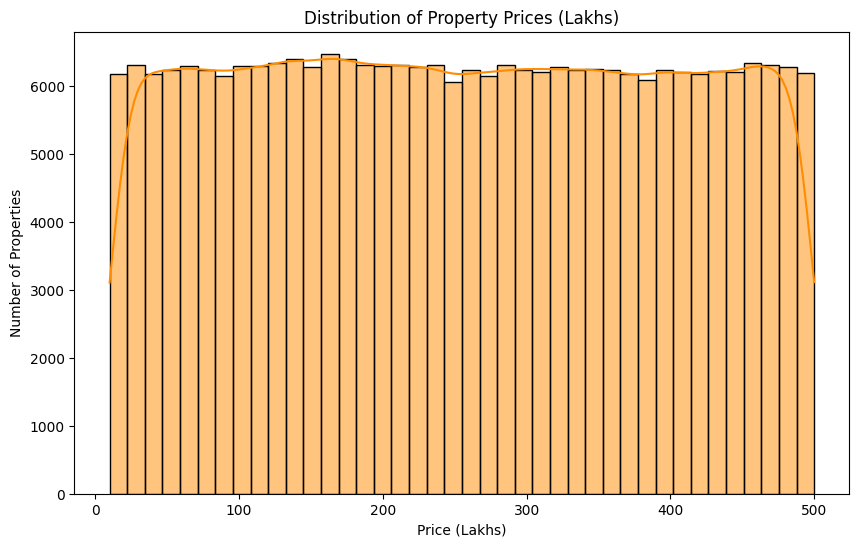

In [25]:
# Distribution of property prices (in Lakhs)

plt.figure(figsize=(10, 6))
sns.histplot(df["Price_in_Lakhs"], bins=40, kde=True, color="darkorange")
plt.title("Distribution of Property Prices (Lakhs)")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Number of Properties")
plt.show()



# **Findings**-

1. Property prices are spread between low, mid, and high ranges with a fairly smooth distribution.  
2. There is a dense concentration around the **mid-price band**, indicating many mid-range properties.  
3. Extreme high prices are fewer, which is expected as luxury properties are rarer.  
4. For investment, mid-range properties often balance **affordability and appreciation potential**.


# **Chart 2 – Distribution of Property Sizes**

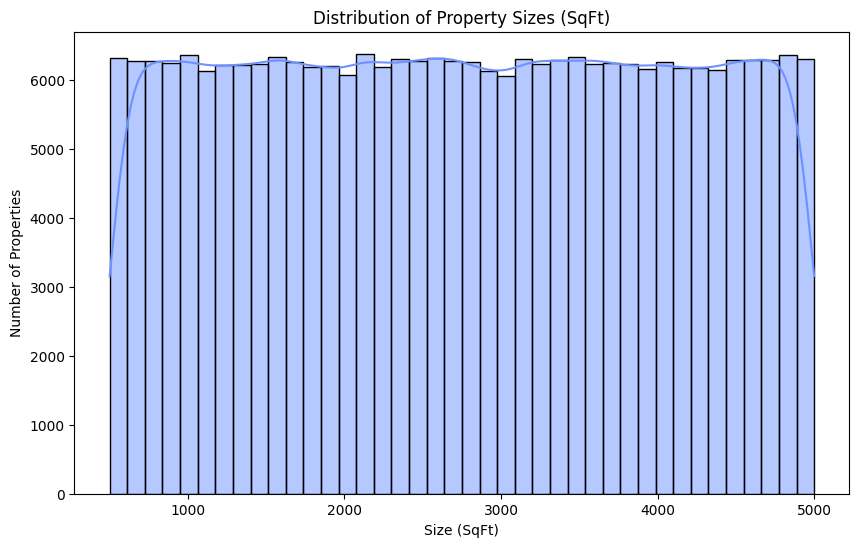

In [26]:
# Distribution of property sizes (SqFt)

plt.figure(figsize=(10, 6))
sns.histplot(df["Size_in_SqFt"], bins=40, kde=True, color=sns.color_palette("cool_r")[3])
plt.title("Distribution of Property Sizes (SqFt)")
plt.xlabel("Size (SqFt)")
plt.ylabel("Number of Properties")
plt.show()

# **Findings**-

1. Most properties fall in a **moderate size range**, with fewer very small or extremely large properties.  
2. The spread indicates options for both compact and spacious homes, but investors may target the **popular size range** for easier resale.  
3. Combining this with price gives us **value-for-money** clusters.


# **Chart 3 – Distribution & Outliers of Price per SqFt**

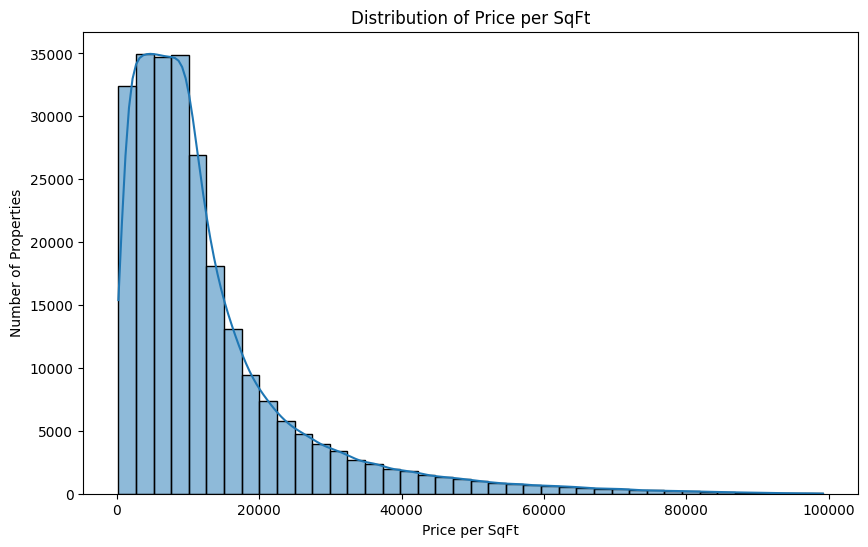

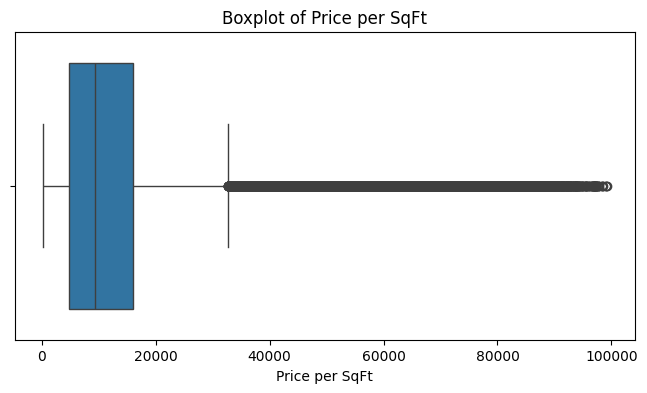

In [22]:
# Distribution and potential outliers in Price_per_SqFt

plt.figure(figsize=(10, 6))
sns.histplot(df["Price_per_SqFt"], bins=40, kde=True)
plt.title("Distribution of Price per SqFt")
plt.xlabel("Price per SqFt")
plt.ylabel("Number of Properties")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Price_per_SqFt"])
plt.title("Boxplot of Price per SqFt")
plt.xlabel("Price per SqFt")
plt.show()


# **Findings**-

1. **Price_per_SqFt** is concentrated in a narrow band, with a few higher and lower extremes.  
2. Boxplot indicates some **potential outliers**—these could be underpriced or overpriced properties.  
3. Outliers may represent **rare opportunities** (cheap for area) or **overvalued listings** that investors should avoid.  
4. Price per sq ft is a key metric for defining **“Good Investment”** vs **overpriced**.


# **Chart 4 – Price per SqFt by Property Type**

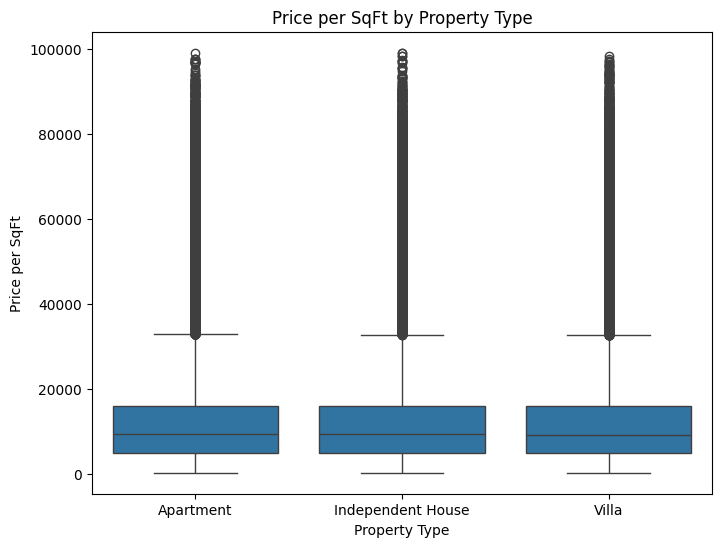

In [27]:
# Price_per_SqFt distribution by Property_Type

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Property_Type", y="Price_per_SqFt")
plt.title("Price per SqFt by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price per SqFt")
plt.show()


# **Findings**-

1. Different **property types** (Apartment, Villa, Independent House) have **very similar price-per-sqft ranges** in this dataset.  
2. No property type stands out as dramatically cheaper or costlier per sq ft.  
3. For this dataset, investment decisions may depend more on **location, amenities, and age**, rather than just the property type.


# **Chart 5 – Relationship between Size and Price**

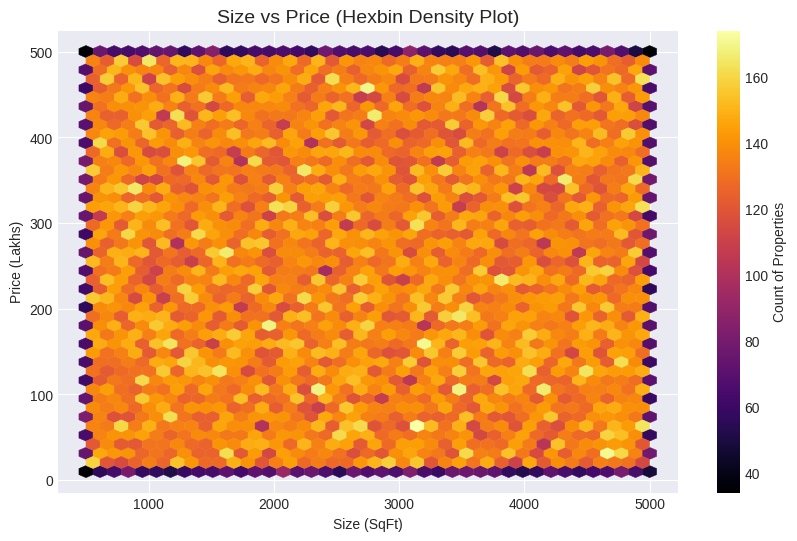

In [33]:
# Relationship between Size_in_SqFt and Price_in_Lakhs

# Hexbin Density Plot for Size vs Price

plt.figure(figsize=(10, 6))
plt.style.use("seaborn-v0_8-darkgrid")

hb = plt.hexbin(
    df["Size_in_SqFt"],
    df["Price_in_Lakhs"],
    gridsize=40,             # Adjusted hexagon size for clarity
    cmap="inferno",          # Smooth gradient color scheme
    mincnt=1,                # Only show hexagons with at least one point
    linewidths=0.3           # Thin borders around the hexagons
)

plt.colorbar(hb, label="Count of Properties")
plt.title("Size vs Price (Hexbin Density Plot)", fontsize=14)
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.show()





# **Findings-**

- The dataset is highly dense and uniformly spread across price and size ranges.  
- The hexbin visualization highlights clusters where multiple properties share similar size–price combinations.  
- There is **no strong linear relationship** visible between property size and price in this dataset.  
- This indicates that property value is influenced by **many other factors** such as location, amenities, age, and infrastructure.  
- Hexbin representation makes dense data interpretable and visually meaningful.

# **Chart 6 – Average Price per SqFt by State**

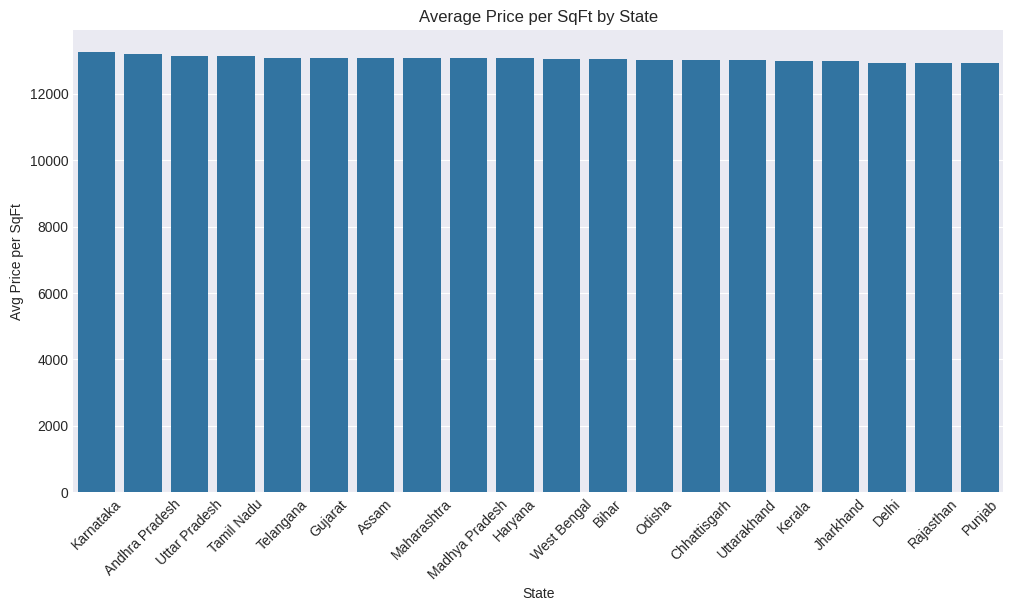

In [34]:
# Average Price_per_SqFt by State

state_pps = df.groupby("State")["Price_per_SqFt"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_pps.index, y=state_pps.values)
plt.title("Average Price per SqFt by State")
plt.xlabel("State")
plt.ylabel("Avg Price per SqFt")
plt.xticks(rotation=45)
plt.show()


# **Findings**-

1. States show **small but noticeable differences** in average price per sq ft.  
2. Some states (e.g., with higher averages) may represent **more premium markets**, while others offer **better affordability**.  
3. For investors, cheaper price-per-sqft states might be attractive if **future growth** is expected there.


# **Chart 7 – Average Property Price by City (Top 10)**

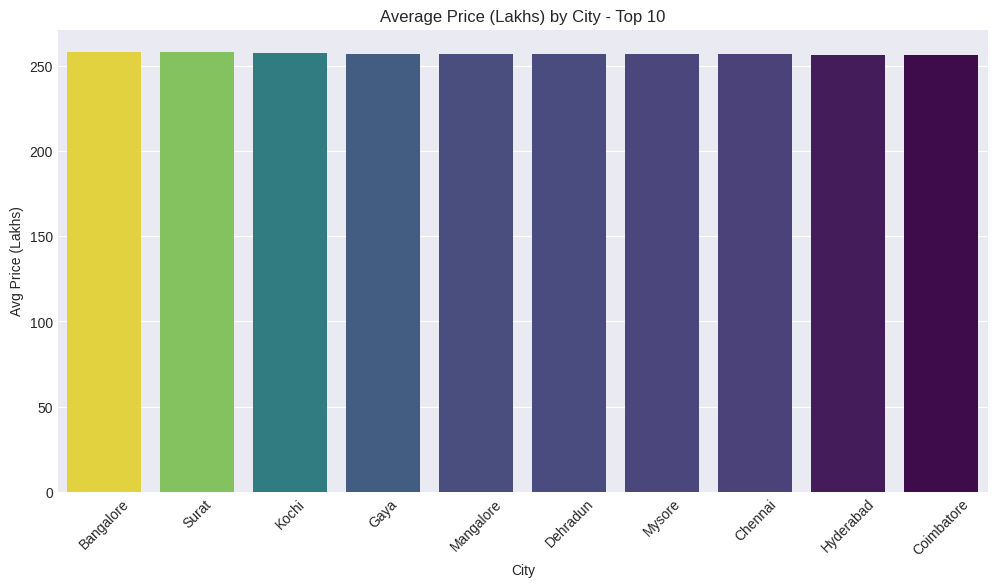

In [39]:
# Average Price_in_Lakhs by City (Top 10)

city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))

# Create gradient colors based on values
norm = plt.Normalize(city_price.min(), city_price.max())
colors = plt.cm.viridis(norm(city_price.values))

sns.barplot(x=city_price.index, y=city_price.values, palette=colors)

plt.title("Average Price (Lakhs) by City - Top 10")
plt.xlabel("City")
plt.ylabel("Avg Price (Lakhs)")
plt.xticks(rotation=45)
plt.show()





# **Findings-**

- These top 10 cities exhibit the highest average real estate prices in the dataset.
- The gradient bar colors reflect the relative ranking:
  - Lighter shades indicate **more expensive** cities.
  - Darker shades represent **relatively lower-priced** cities among the top 10.
- Cities like **Bangalore and Surat** appear at the high end of the price spectrum.
- The consistent bar heights show that top-tier cities have **similar average price levels**,  
  suggesting a competitive and matured real estate market segment.
- This analysis is useful for identifying premium investment locations.

# **Chart 8 – BHK Distribution**

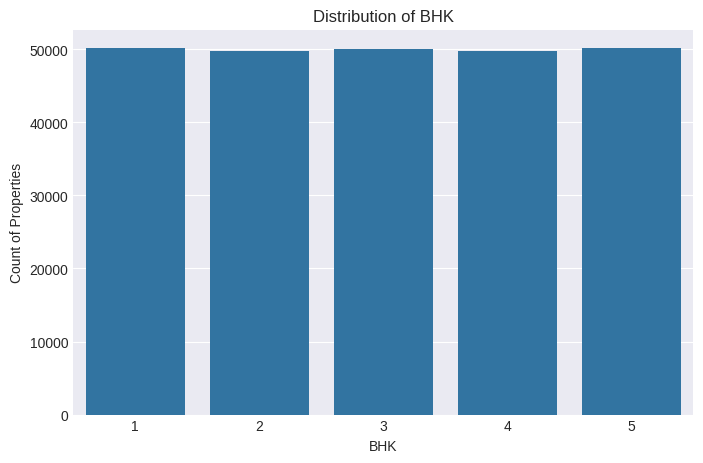

In [40]:
# Distribution of BHK

plt.figure(figsize=(8, 5))
sns.countplot(x="BHK", data=df)
plt.title("Distribution of BHK")
plt.xlabel("BHK")
plt.ylabel("Count of Properties")
plt.show()

# **Findings**-

1. BHK distribution is **almost uniform** in this dataset (1–5 BHK are similarly represented).  
2. This gives good coverage for analyzing investment potential across different **configuration segments**.  
3. In real-world analysis, investors often prefer **2–3 BHK** as they are easiest to rent/resell; this dataset will help compare.


# **Chart 9 – Correlation between Numeric Features**

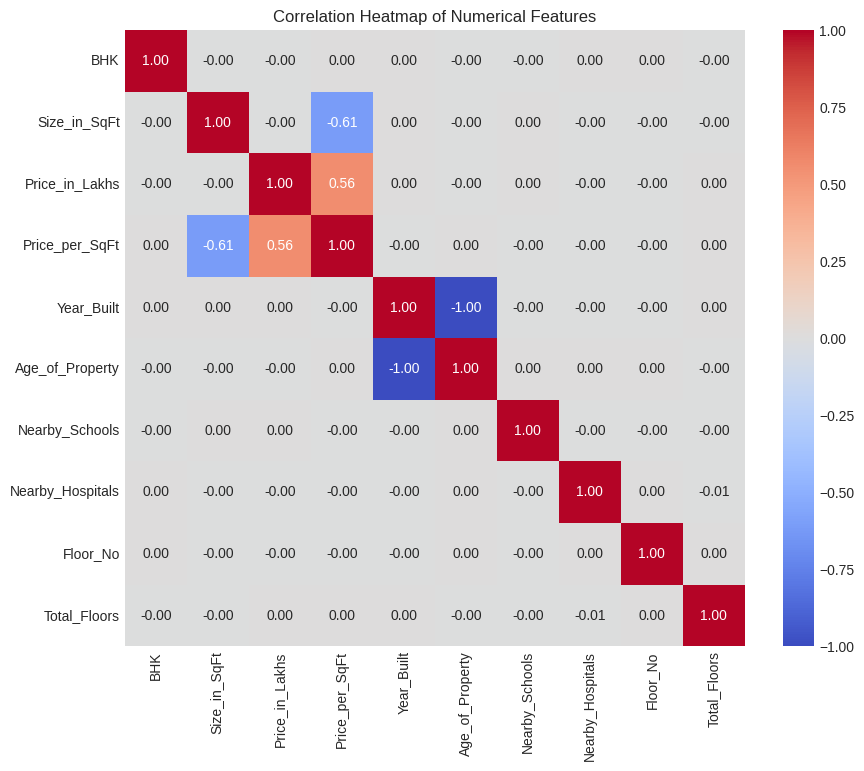

In [41]:
# Correlation heatmap for key numeric features

numeric_cols = [
    "BHK", "Size_in_SqFt", "Price_in_Lakhs", "Price_per_SqFt",
    "Year_Built", "Age_of_Property", "Nearby_Schools",
    "Nearby_Hospitals", "Floor_No", "Total_Floors"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# **Findings**-

1. **Price_in_Lakhs** is moderately positively correlated with **Price_per_SqFt**.  
2. **Price_per_SqFt** is moderately negatively correlated with **Size_in_SqFt**, meaning **smaller homes often have higher price-per-sqft** in this dataset.  
3. Other correlations are weak, suggesting **multi-factor interactions** rather than one dominant numeric driver.  
4. This informs modeling: both **Price_in_Lakhs** and **Price_per_SqFt** should be considered, but size alone may not be enough.


# **Chart 10 – Nearby Schools vs Price per SqFt**

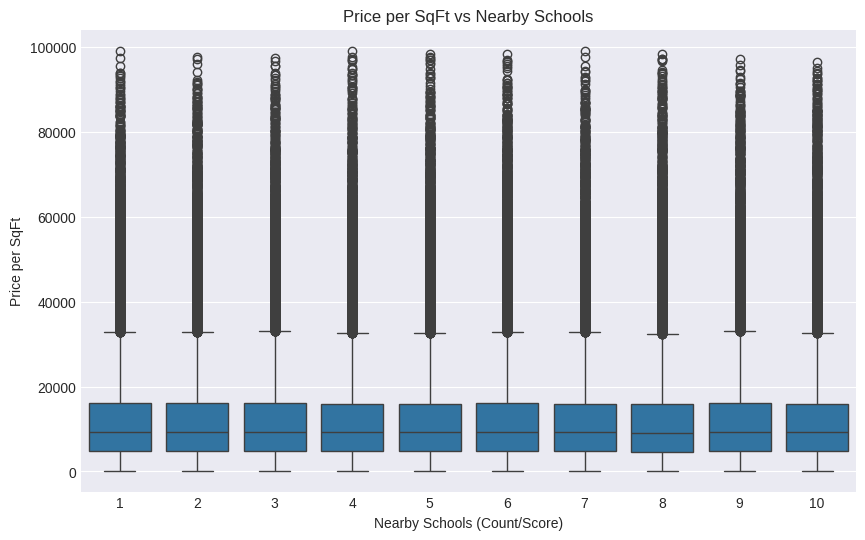

In [42]:
# Relationship between Nearby_Schools and Price_per_SqFt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Nearby_Schools", y="Price_per_SqFt")
plt.title("Price per SqFt vs Nearby Schools")
plt.xlabel("Nearby Schools (Count/Score)")
plt.ylabel("Price per SqFt")
plt.show()


# **Findings**-

1. The distribution of **Price_per_SqFt** across different school-count levels is quite similar in this dataset.  
2. There is **no strong monotonic trend** (like “more schools ⇒ much higher price per sq ft”).  
3. In real markets, better school access often commands a premium, but here the effect is **subtle or normalized**.  
4. For modeling, this feature may still contribute in combination with location and amenities.


# **Chart 11 – Nearby Hospitals vs Price per SqFt**

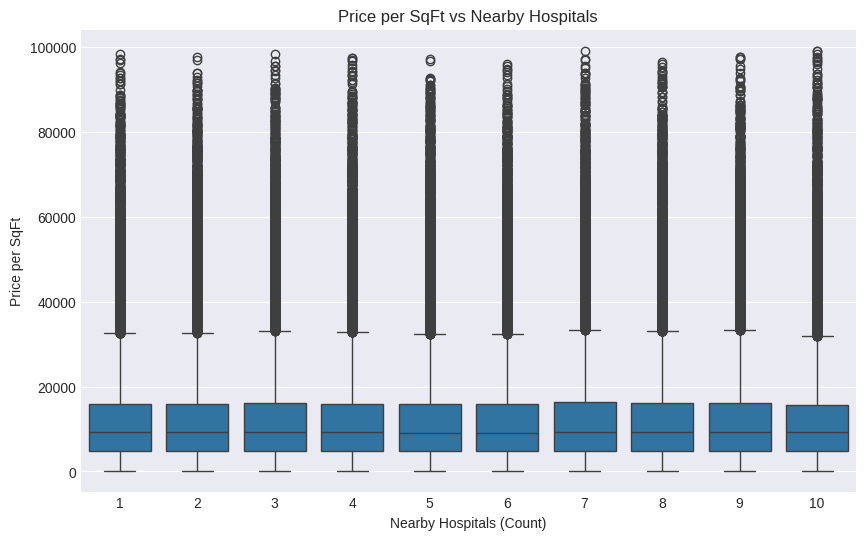

In [43]:
# Relationship between Nearby_Hospitals and Price_per_SqFt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Nearby_Hospitals", y="Price_per_SqFt")
plt.title("Price per SqFt vs Nearby Hospitals")
plt.xlabel("Nearby Hospitals (Count)")
plt.ylabel("Price per SqFt")
plt.show()


# **Findings**-

1. Similar to schools, **nearby hospital count** does not drastically change price per sq ft in this dataset.  
2. The distribution across hospital-count categories is relatively stable.  
3. This suggests that the dataset may already be standardized or synthetic, with balanced access.  
4. Even if individually weak, such features can contribute to an **“accessibility/infrastructure score”** for investment analysis.


# **Chart 12 – Parking, Public Transport & Price per SqFt**

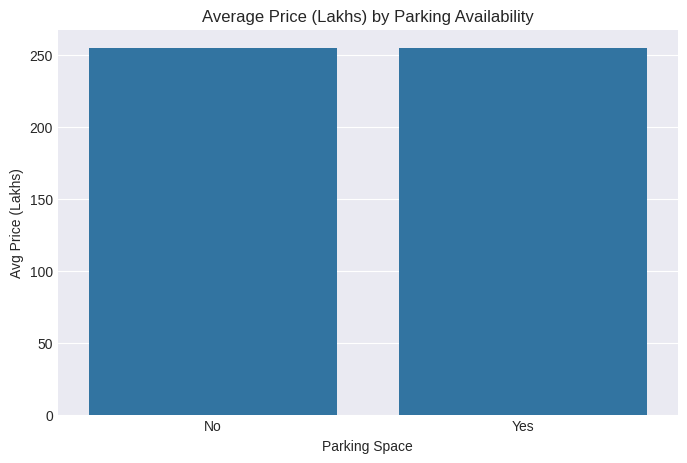

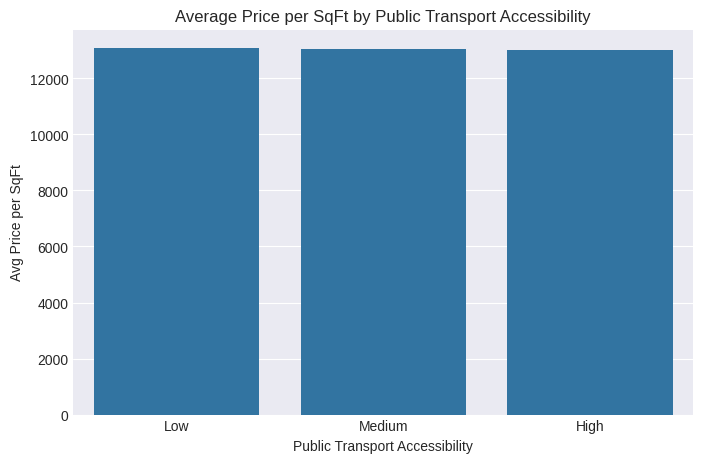

In [45]:
# Parking Space vs Price_in_Lakhs

plt.figure(figsize=(8, 5))
parking_price = df.groupby("Parking_Space")["Price_in_Lakhs"].mean()

sns.barplot(x=parking_price.index, y=parking_price.values)
plt.title("Average Price (Lakhs) by Parking Availability")
plt.xlabel("Parking Space")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

# Public Transport Accessibility vs Price_per_SqFt

plt.figure(figsize=(8, 5))
pta_pps = df.groupby("Public_Transport_Accessibility")["Price_per_SqFt"].mean().sort_values(ascending=False)

sns.barplot(x=pta_pps.index, y=pta_pps.values)
plt.title("Average Price per SqFt by Public Transport Accessibility")
plt.xlabel("Public Transport Accessibility")
plt.ylabel("Avg Price per SqFt")
plt.show()


# **Findings**-

1. Average prices for properties **with vs without parking** are quite close, but having parking is still a **qualitative plus** for many investors/tenants.  
2. **Public_Transport_Accessibility** (High/Medium/Low) shows slight variation in average price per sq ft, but not extremely strong in this dataset.  
3. In practice, good public transport and guaranteed parking usually increase **liquidity and rentability** of a property, which should be considered when labeling “Good Investment”.


# **Conclusion**

The Exploratory Data Analysis (EDA) conducted on the Indian real estate dataset provides valuable insights into property pricing trends, location-based variations, and investment potential.

Property prices and price-per-square-foot values show a wide distribution, indicating a diverse market with options across different affordability segments. The analysis reveals that **property size alone is not a strong determinant of price**; instead, valuation is influenced by multiple interacting factors such as location, nearby amenities, accessibility, and property configuration.

Location emerges as one of the most impactful features. Cities with higher demand and established real-estate infrastructure tend to maintain higher average prices, while developing cities display competitive pricing and potential growth opportunities.

Feature-based analysis—such as BHK count, furnishing status, and proximity to schools or hospitals—shows minimal direct impact on price when considered individually, suggesting that real estate valuation is **multifactorial** rather than governed by single attributes.

The engineered features like **School Density Score**, **Relative Price to City Median**, and **Good Investment label** help contextualize affordability and investment attractiveness at a deeper level.

These insights guide better decision-making and lay a strong foundation for future modeling tasks, such as predicting property appreciation and classifying investment quality.

Overall, the EDA highlights that **successful real estate investment depends on a combination of affordability, location quality, infrastructure access, and property attributes**, rather than absolute price or size alone.


# **Top 10 Recommendations for Real Estate Investment**

### 1️⃣ Focus on cities with strong price performance and steady demand.  
Cities like Bangalore, Surat, and Kochi demonstrate high average prices, suggesting strong market maturity and investor confidence.

### 2️⃣ Use Price-per-SqFt as the primary valuation metric.  
It normalizes size differences and highlights which properties are overvalued or undervalued within a city.

### 3️⃣ Identify properties listed below the city’s median price-per-sqft.  
These represent better affordability and often qualify as potential **“Good Investments.”**

### 4️⃣ Prefer properties with at least 2 BHK.  
2–3 BHK configurations have the highest demand, offering better resale and rental returns.

### 5️⃣ Prioritize locations with medium-to-high public transport accessibility.  
Connectivity is a key factor driving rentability and long-term appreciation.

### 6️⃣ Choose properties that include parking space.  
Even though it may not drastically affect price, it significantly enhances rental appeal and buyer preference.

### 7️⃣ Consider moderately aged properties (5–15 years).  
They often offer better pricing, established infrastructure, and lower structural risk than newly built or very old properties.

### 8️⃣ Evaluate amenities collectively rather than individually.  
Security features, gym, pool, clubhouse, and green spaces together influence property desirability more effectively than single amenities.

### 9️⃣ Avoid excessively large properties unless priced aggressively.  
Larger properties typically show diminishing returns on price-per-sqft and may yield lower ROI.

### 🔟 Use engineered metrics (e.g., School Density Score, Relative Price Ratio) to compare micro-locations.  
Micro-market analysis provides a more accurate representation of investment potential compared to city-level averages.